# Border Padding
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [border_padding.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/border_padding.ipynb)
---
Bi-dimensional image padding to deal with borders of spatial filtering and convolution. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numba import stencil
import imageio

from _utils import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 0. Input image and Box Filter function
---

In [3]:
img_in = imageio.imread('../_data/fruits.png')

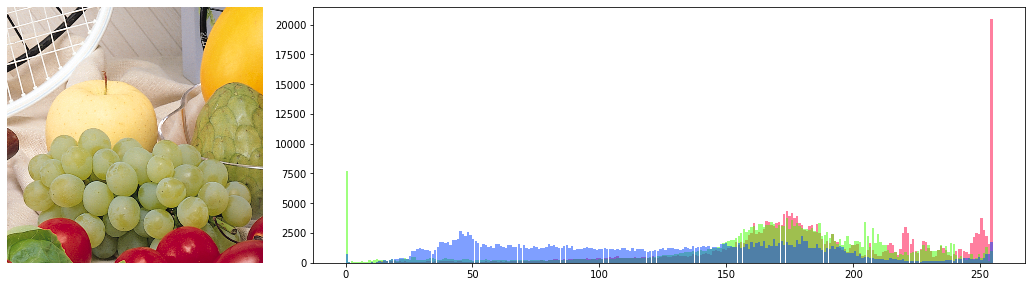

In [4]:
histogram(img_in, bins=2**8)

In [5]:
def pbox_filter(M, r):
    @stencil(neighborhood=(
        (-r, r),
        (-r, r)
    ))
    def box_filter(M):
        output = 0
        for i in range(-r, r + 1):
            for j in range(-r, r + 1):
                output += M[i, j]
        return output/(2*r + 1)**2
    return box_filter(M)

def pbox_filterRGB(img, r):
    img_out = img.copy()
    img_out[..., 0] = pbox_filter(img[..., 0], r)
    img_out[..., 1] = pbox_filter(img[..., 1], r)
    img_out[..., 2] = pbox_filter(img[..., 2], r)
    return img_out

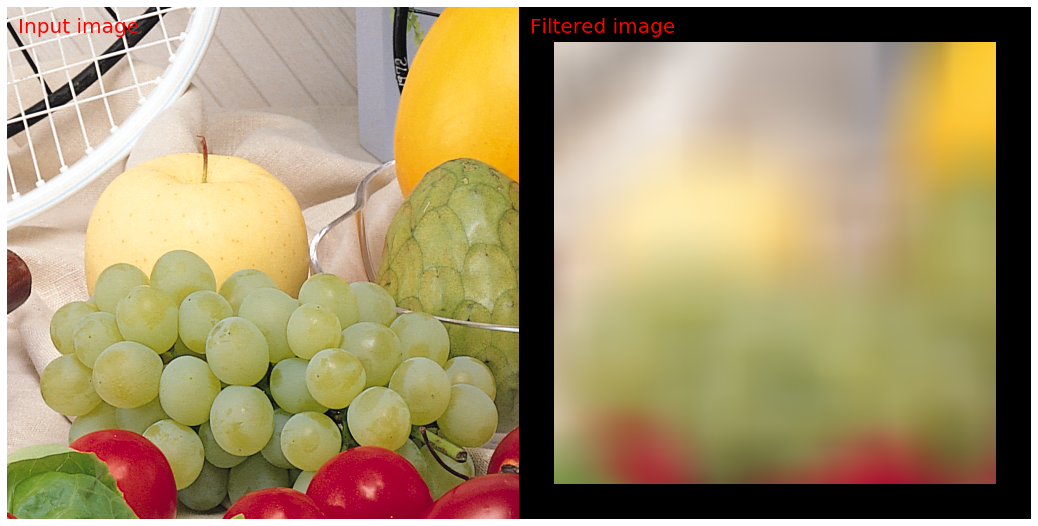

In [6]:
dict_panel = {
    'text_color': 'red',
    'text_size': 20,
    'texts': ['Input image', 'Filtered image']
}
img_f0 = pbox_filterRGB(img_in , 35)
panel(
    np.array([img_in, img_f0]),
    gspec=(2, 1), **dict_panel
)

Without padding, the border of the filtered image will receive 0.

## 1. Zero Padding
---
Pads with a constant value (0 in this case), resulting in a artifact with the same value on the border.

|A B C D E F|

0 0 0 |A B C D E F| 0 0 0

In [7]:
# Filter radius
r = 35

In [8]:
img_pad1 = np.pad(
    img_in,
    ((r, r), (r, r), (0, 0)),
    'constant',
    constant_values=0
)

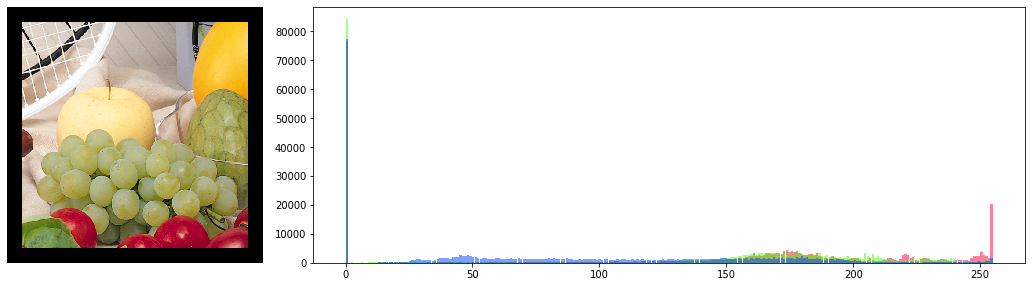

In [9]:
histogram(img_pad1)

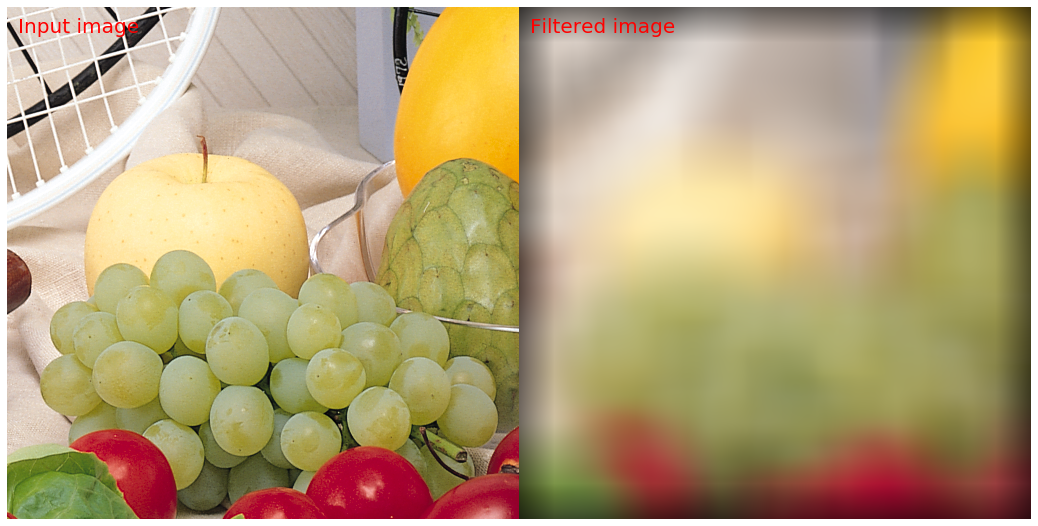

In [10]:
img_f1 = pbox_filterRGB(img_pad1 , r)[r:-r, r:-r]
panel(
    np.array([img_in, img_f1]),
    gspec=(2, 1), **dict_panel
)

We can notice a black border on the filtered image.

## 2. Wrap Padding
---
Pads with a modular repetition of each axis, resulting in some artifacts from the opposite edges.

|A B C D E F|

D E F |A B C D E F| A B C

In [11]:
img_pad2 = np.pad(
    img_in,
    ((r, r), (r, r), (0, 0)),
    'wrap'
)

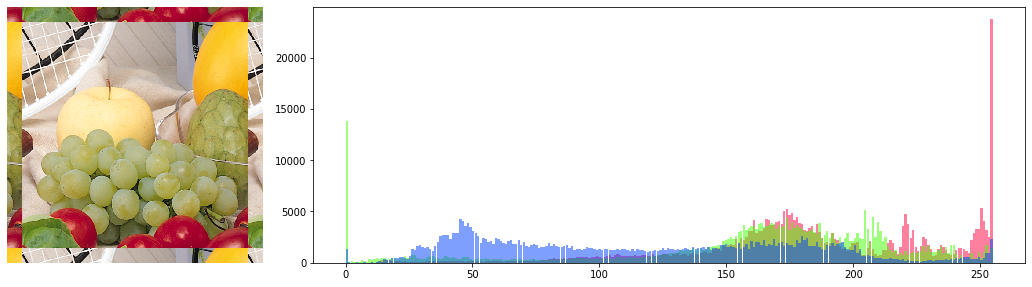

In [12]:
histogram(img_pad2)

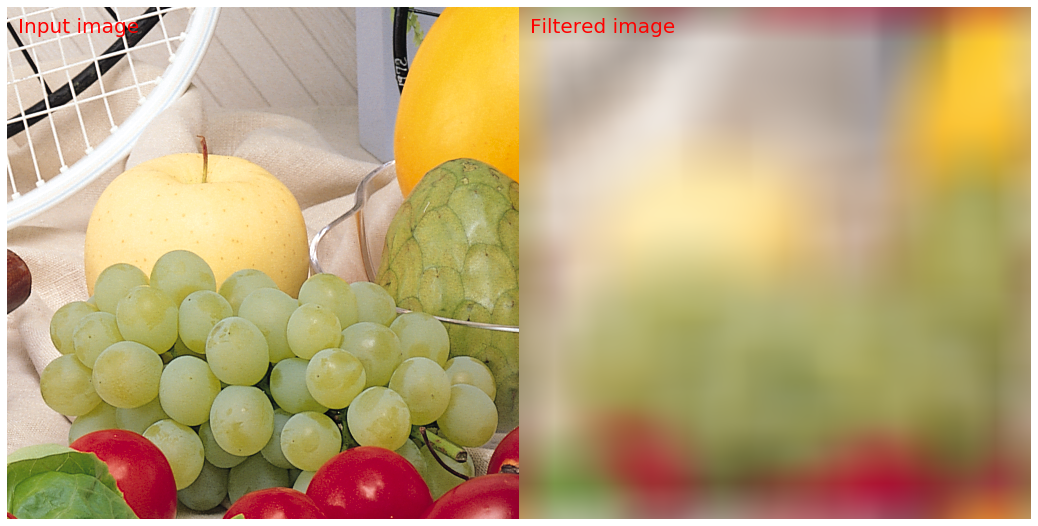

In [13]:
img_f2 = pbox_filterRGB(img_pad2 , r)[r:-r, r:-r]
panel(
    np.array([img_in, img_f2]),
    gspec=(2, 1), **dict_panel
)

We can notice a red artifact on the top of the filtered image which was spread from the bottom part. 

## 3. Reflect Padding
---
Pads with the reflection of each axis.

|A B C D E F|

D C B |A B C D E F| E D C

In [14]:
img_pad3 = np.pad(
    img_in,
    ((r, r), (r, r), (0, 0)),
    'reflect'
)

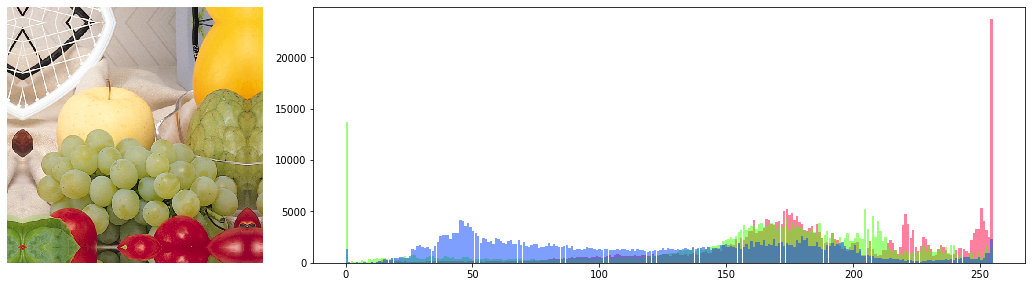

In [15]:
histogram(img_pad3)

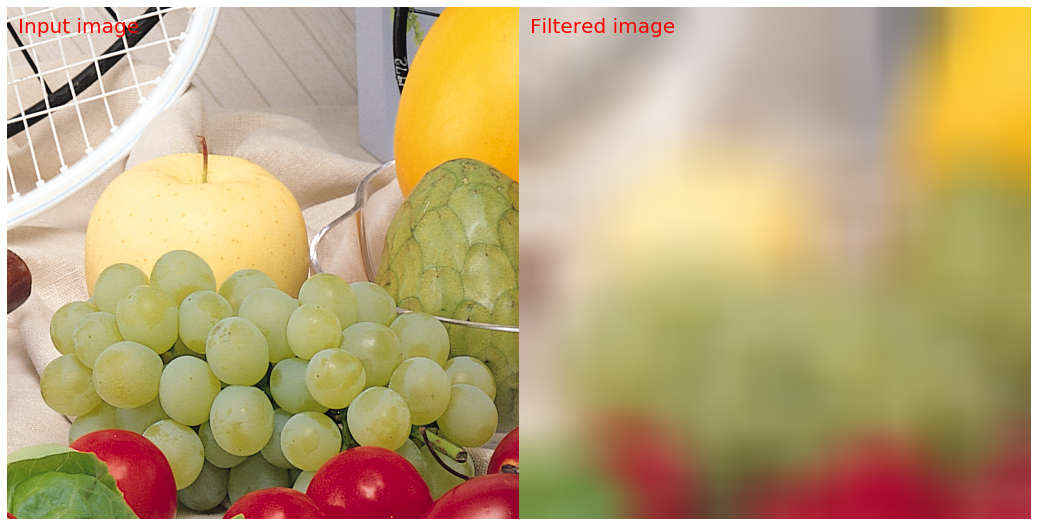

In [16]:
img_f3 = pbox_filterRGB(img_pad3 , r)[r:-r, r:-r]
panel(
    np.array([img_in, img_f3]),
    gspec=(2, 1), **dict_panel
)

## 4. Edge Padding
---
Pads with the edge pixel of each axis.

|A B C D E F|

A A A |A B C D E F| F F F

In [17]:
img_pad4 = np.pad(
    img_in,
    ((r, r), (r, r), (0, 0)),
    'edge'
)

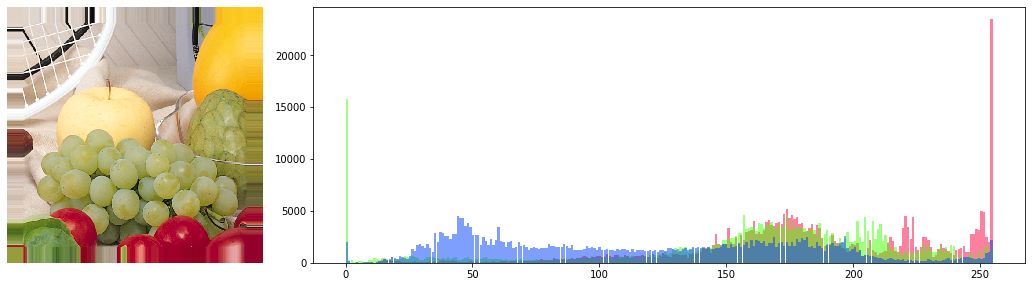

In [18]:
histogram(img_pad4)

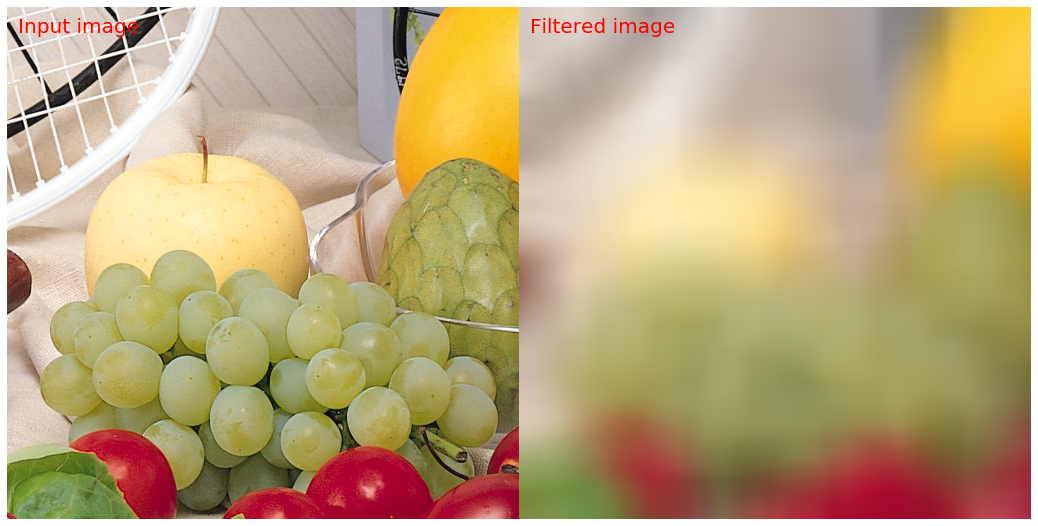

In [19]:
img_f4 = pbox_filterRGB(img_pad4 , r)[r:-r, r:-r]
panel(
    np.array([img_in, img_f4]),
    gspec=(2, 1), **dict_panel
)